In [30]:
# Import required library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_excel('Parkinson data.xlsx')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
df.shape

(195, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
df.name.nunique() # as name column contains unique values, placing it as index 

195

In [6]:
df.set_index('name',inplace=True)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


All columns are numerical

Status column is having 0's and 1's , considering it as target column 

# Checking for class imbalance.

In [11]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

Imbalance can be see in the dataset.Parkinson's have greater representation in the dataset

# Checking for missing vaues and take necessary measures by dropping observation or imputing them.

In [13]:
df.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

There is no missing values in the dataset

# Plotting the distribution of all the features.

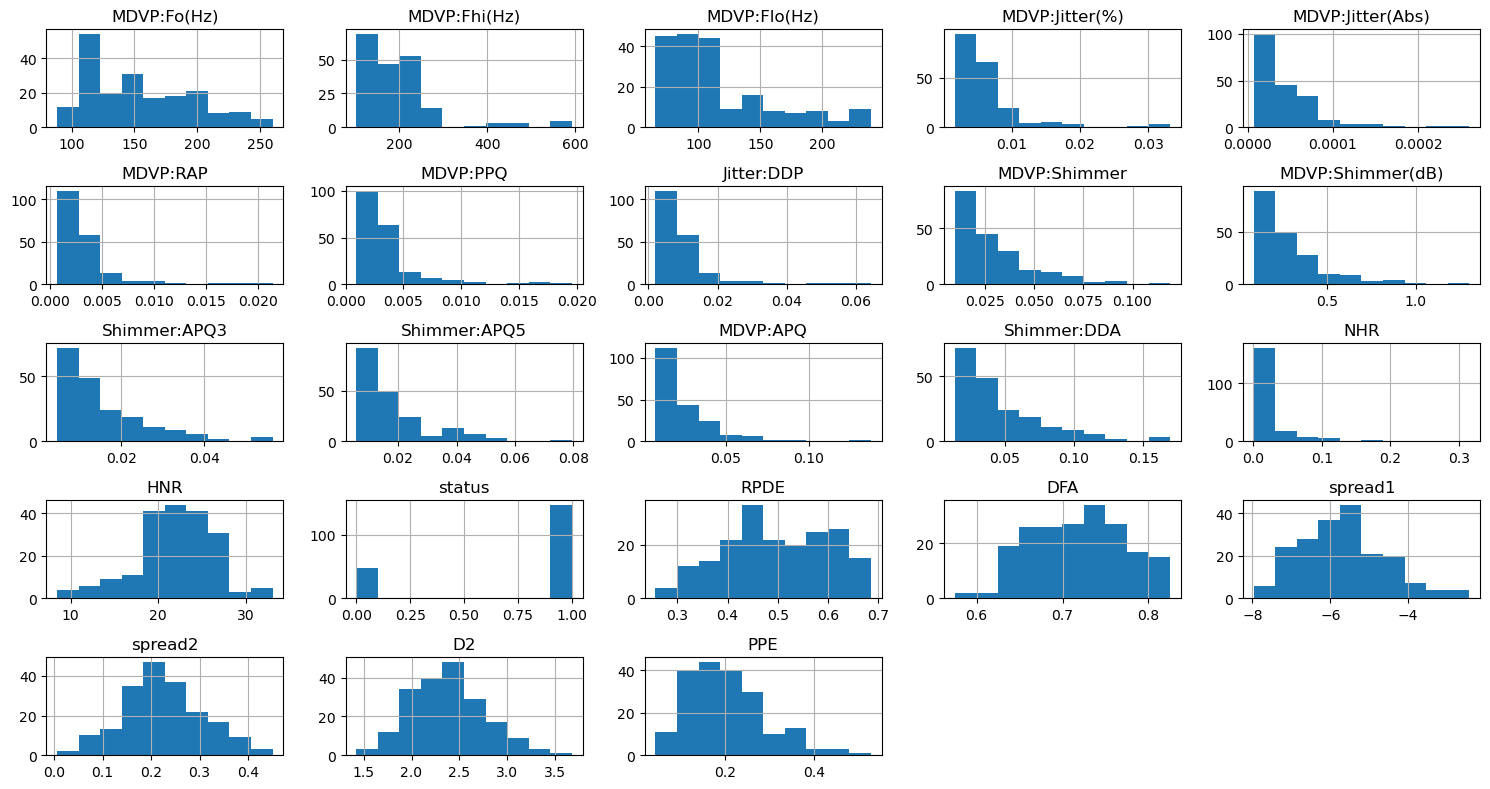

In [15]:
plt.rcParams['figure.figsize']=[15,8]
df.hist()
plt.tight_layout()
plt.show()


 few columns like spread2,D2 are normally distributed
    
 rest of the columns having skewness in the data

In [16]:
df.skew()

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

# Checking for outliers in the data

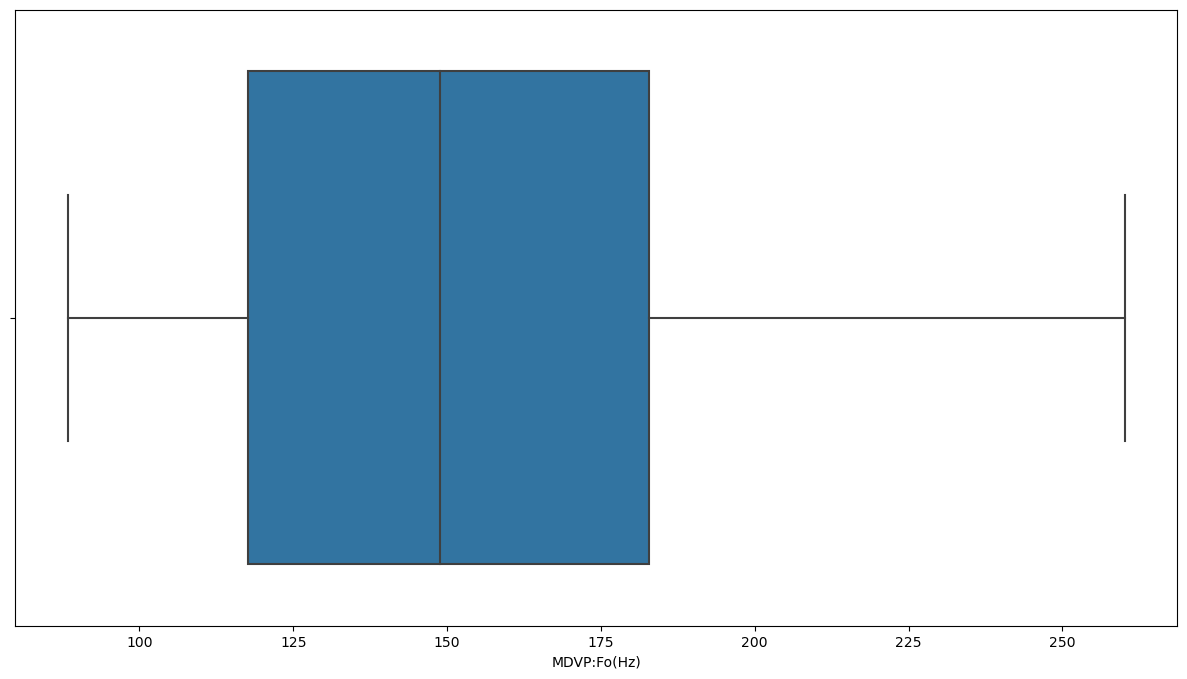

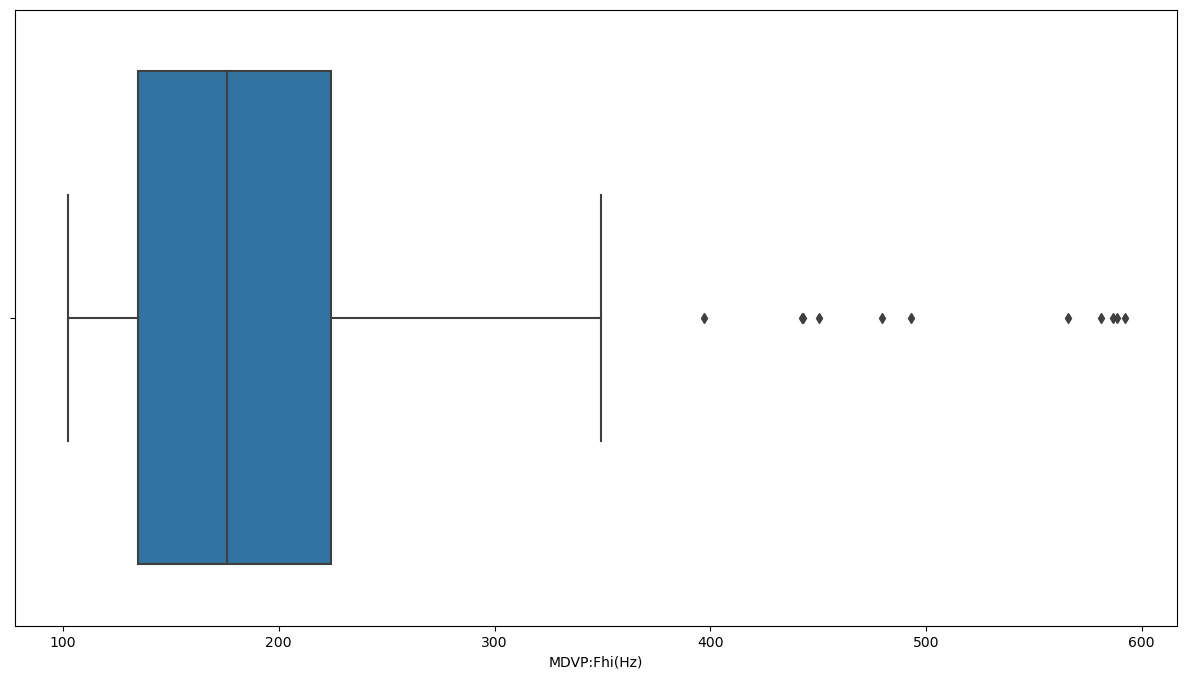

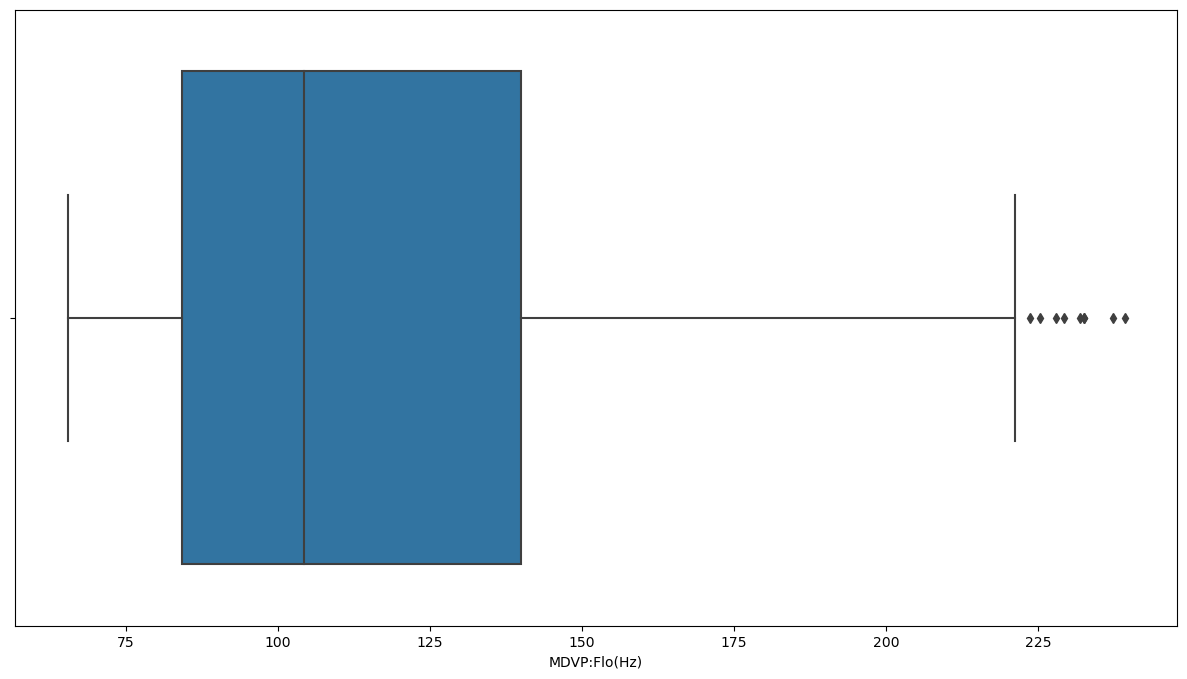

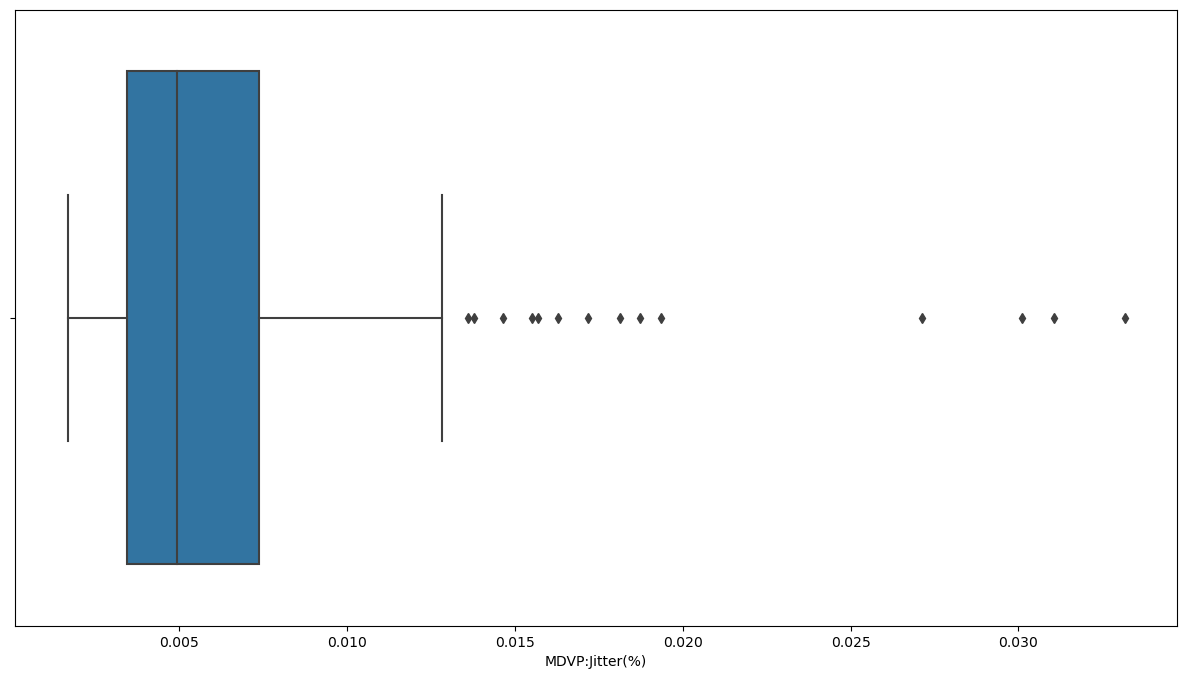

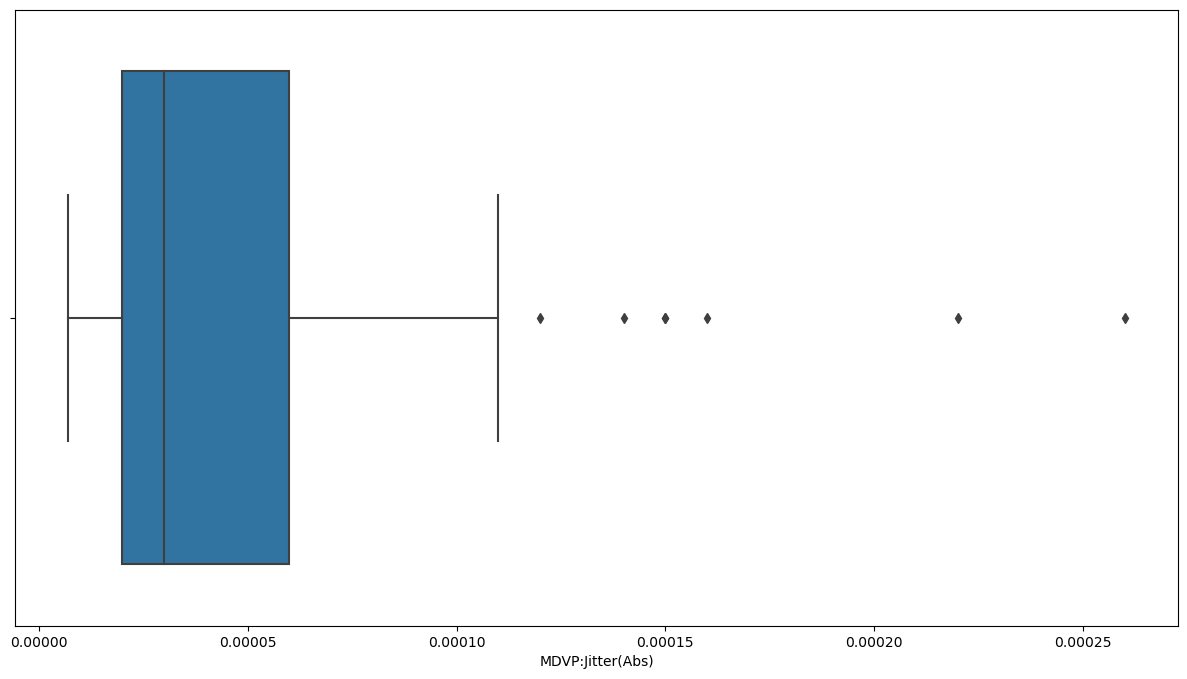

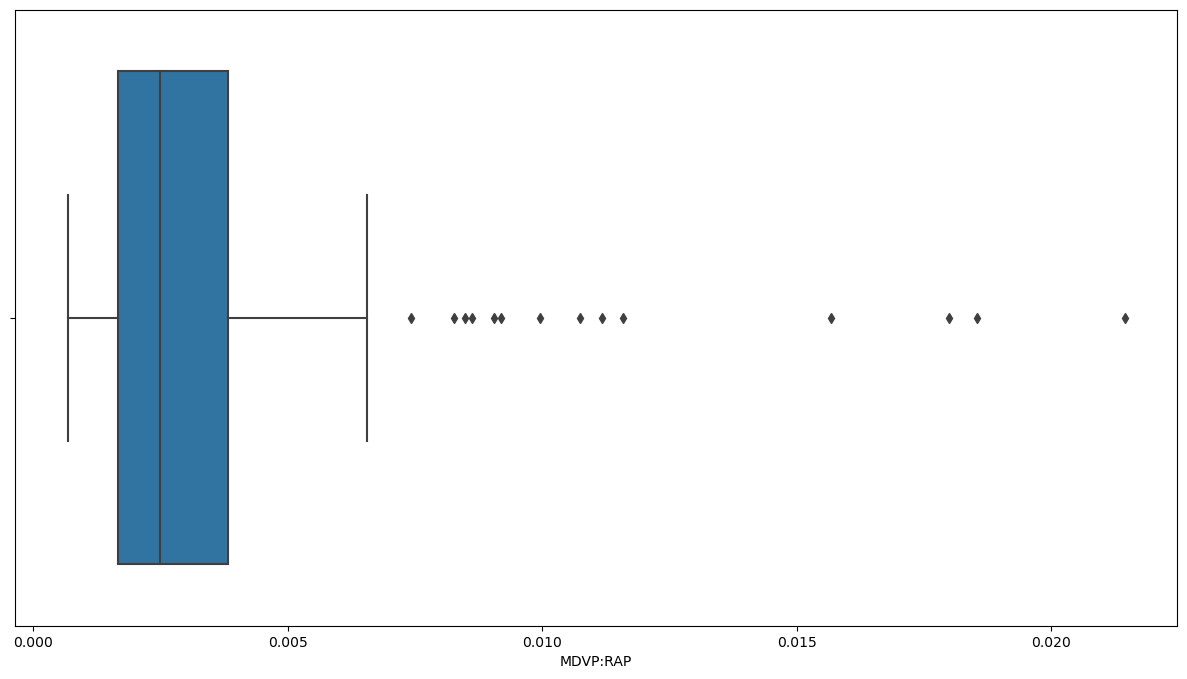

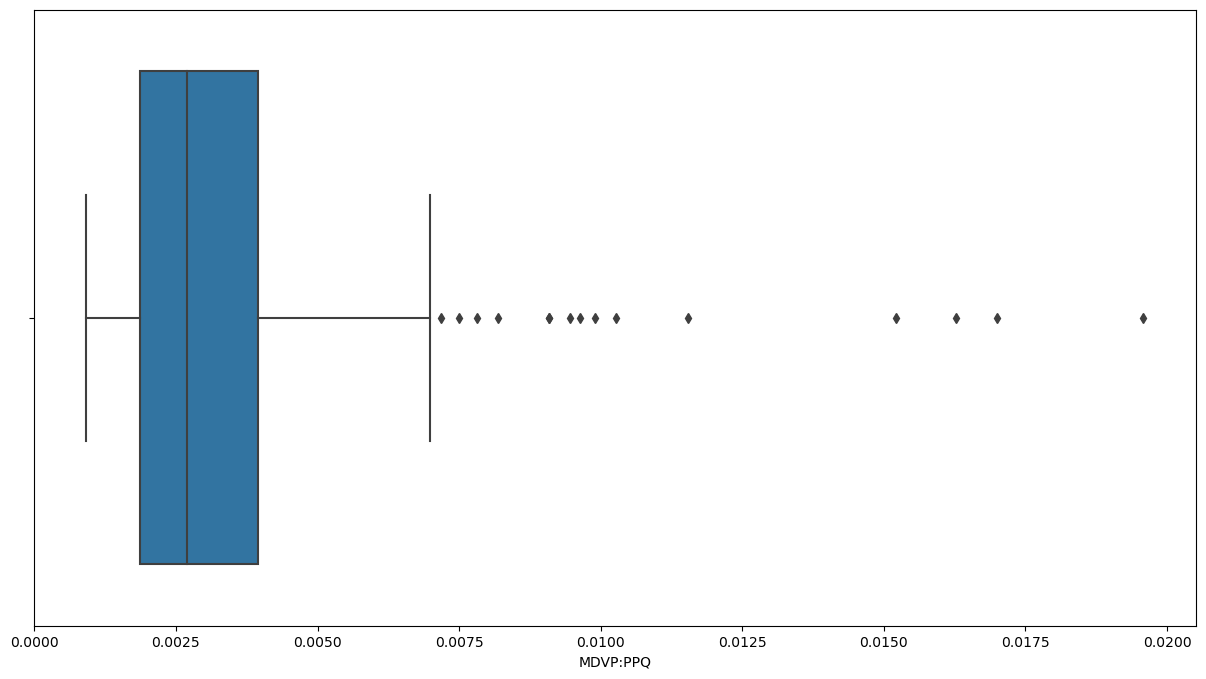

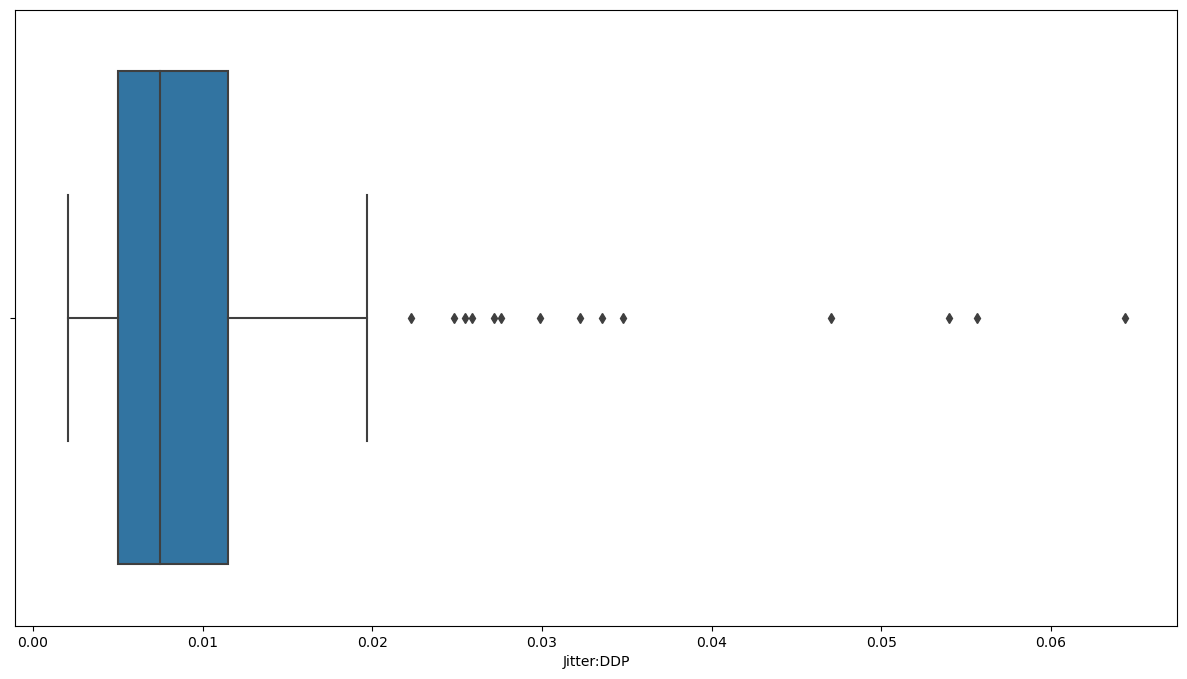

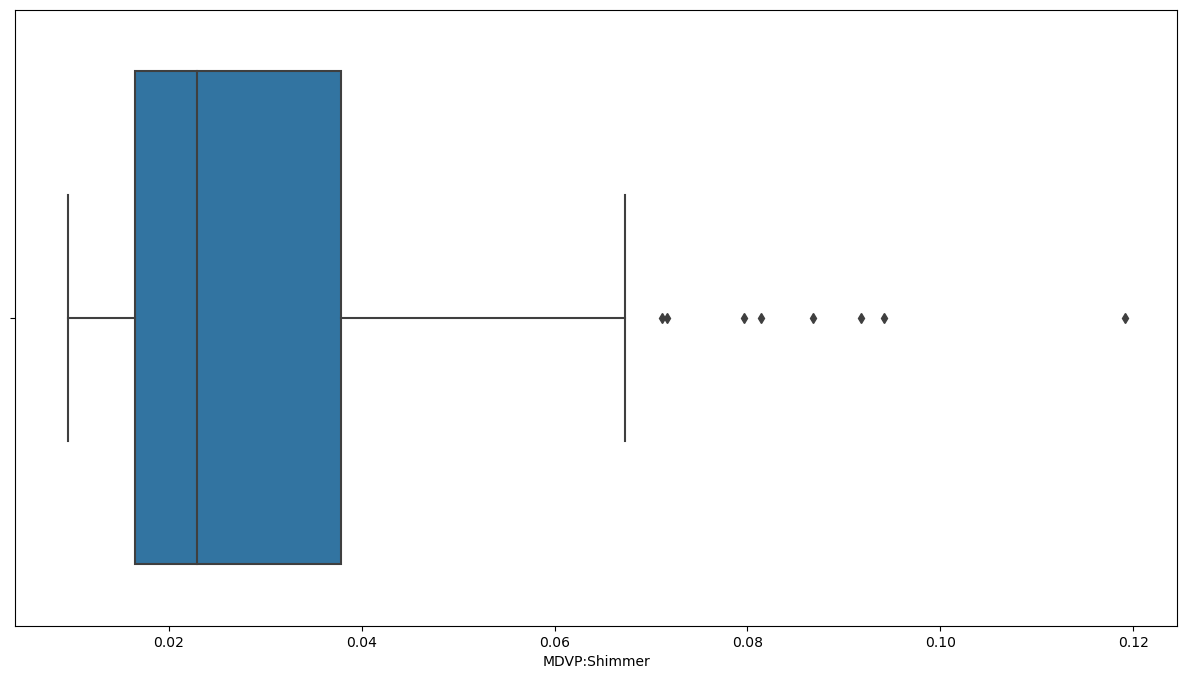

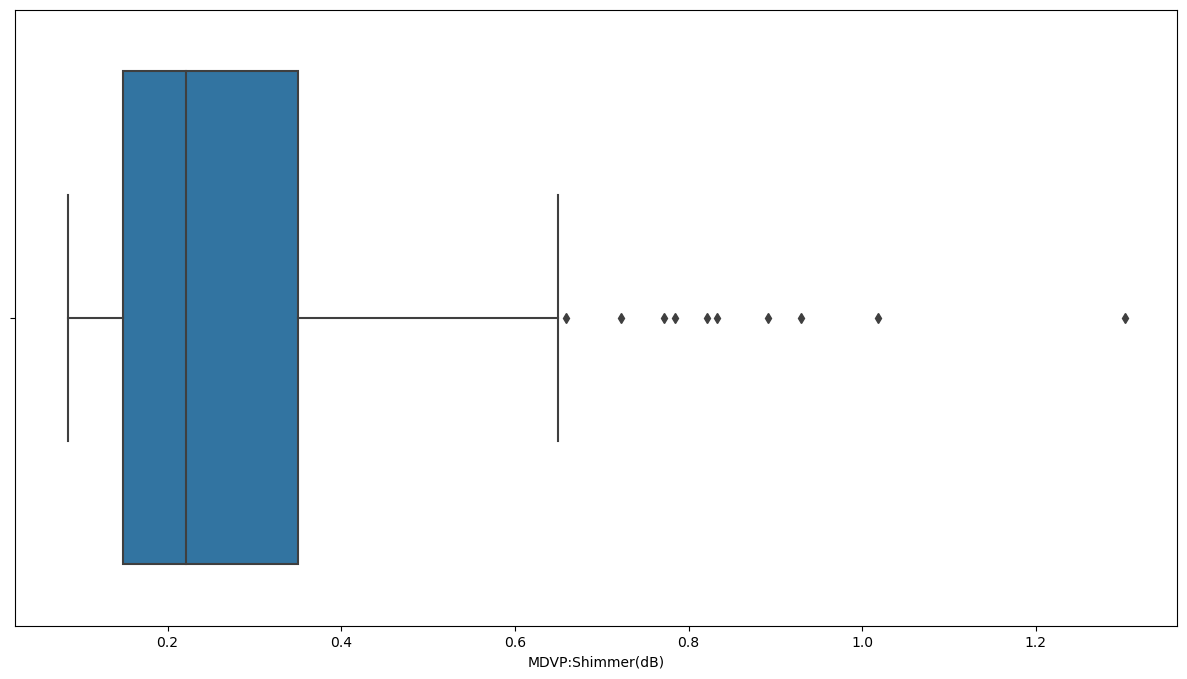

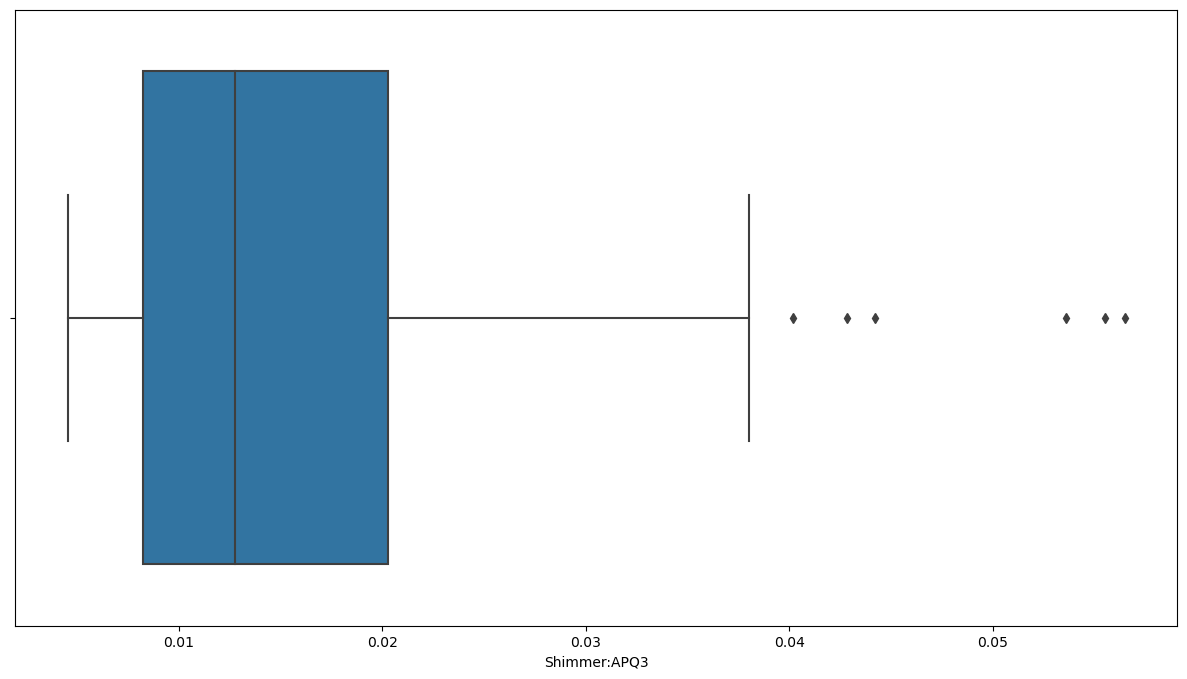

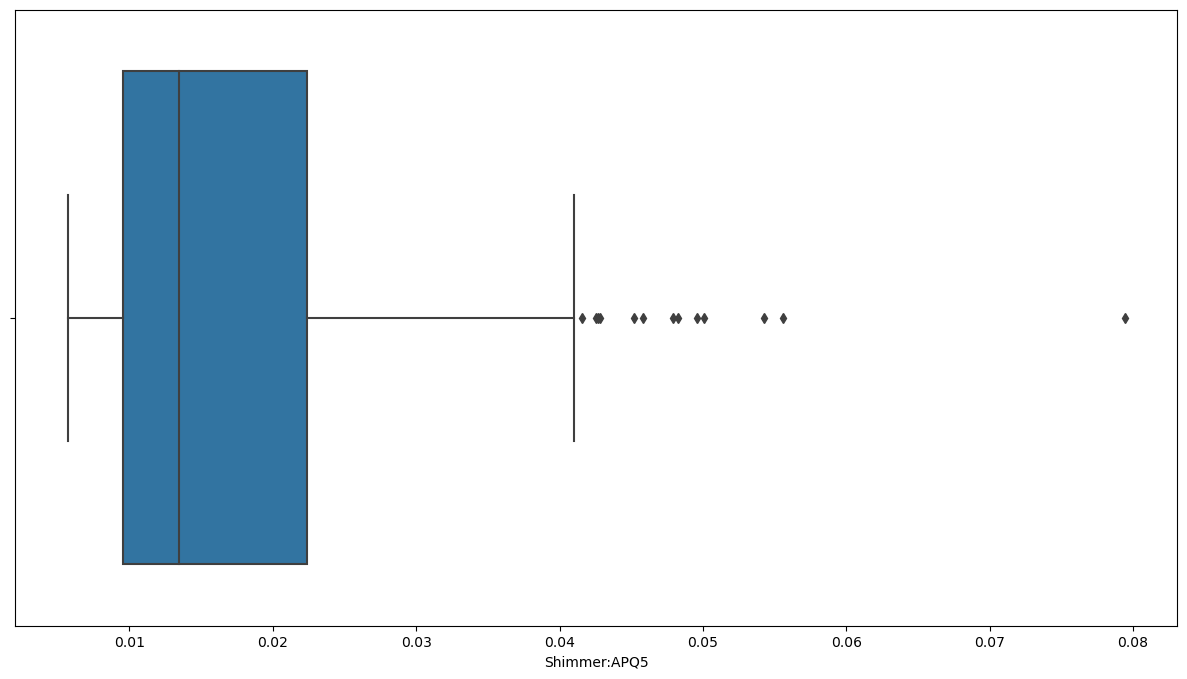

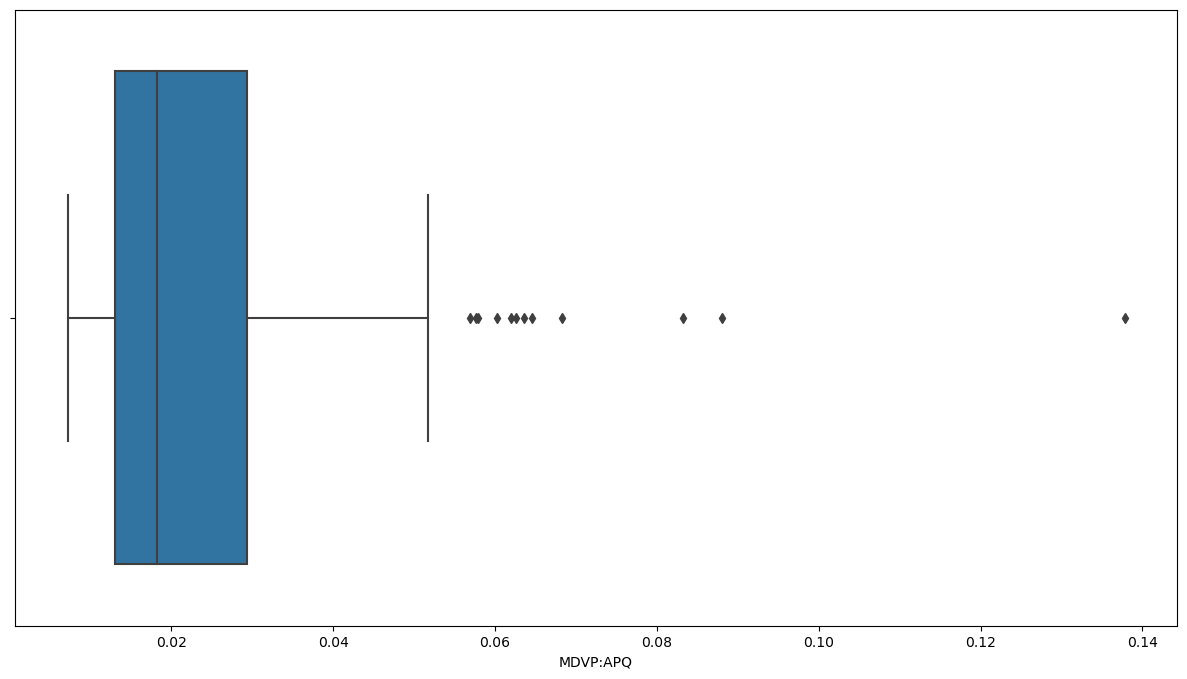

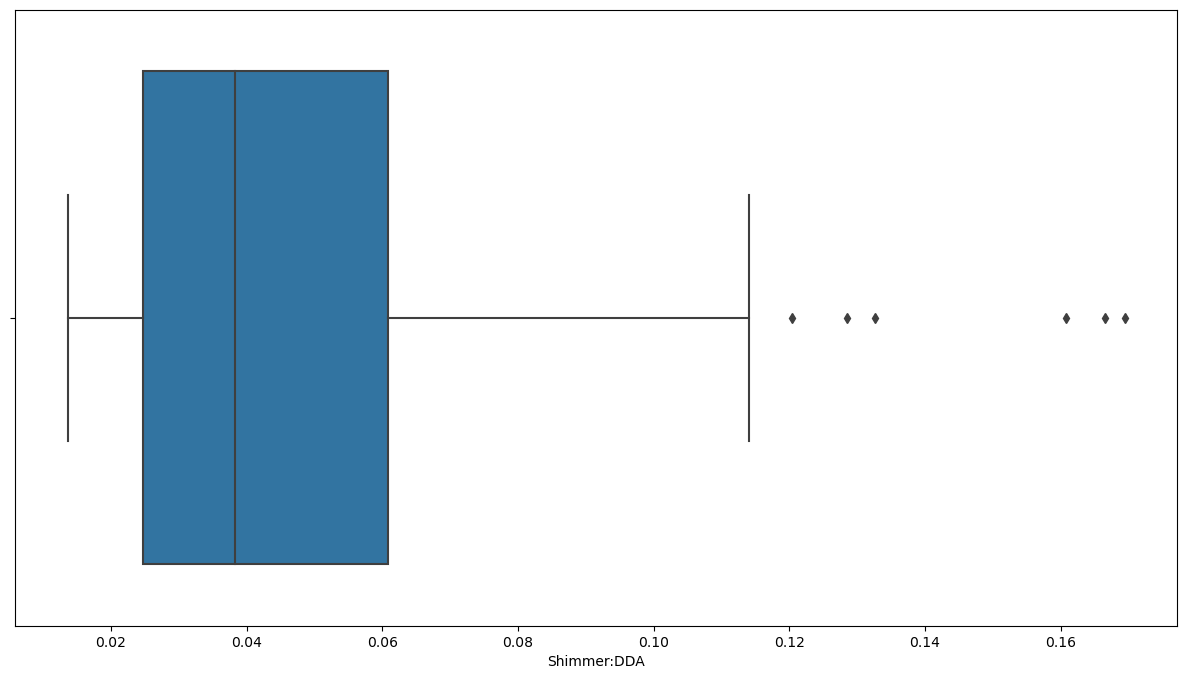

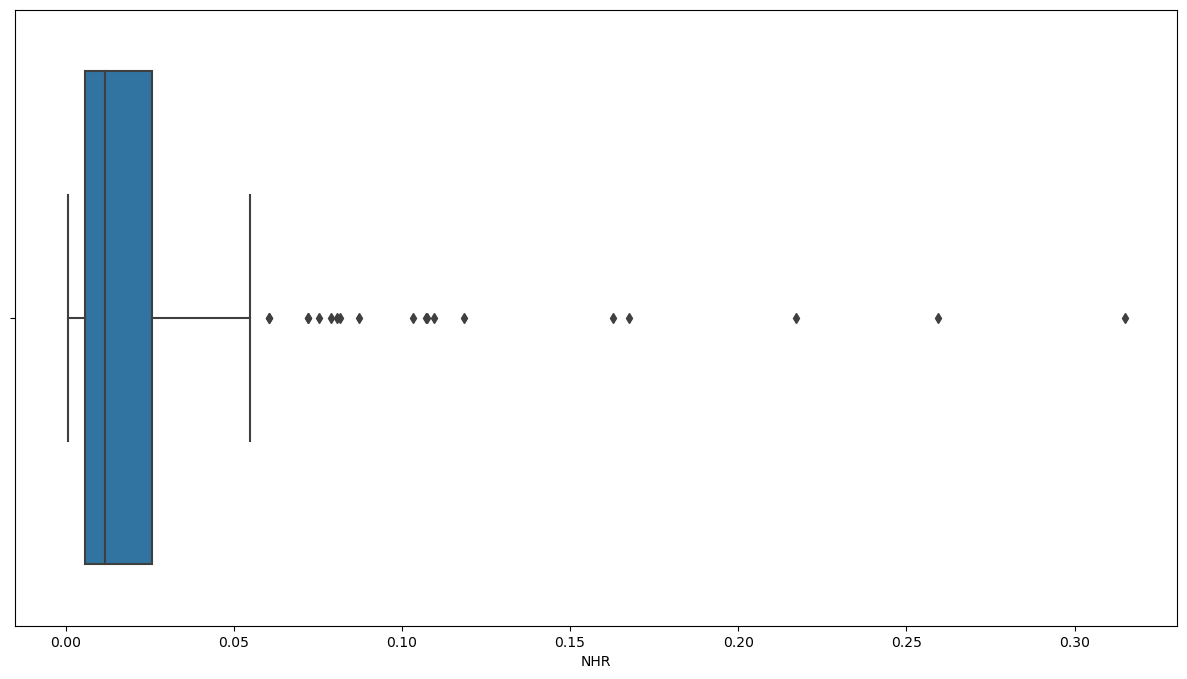

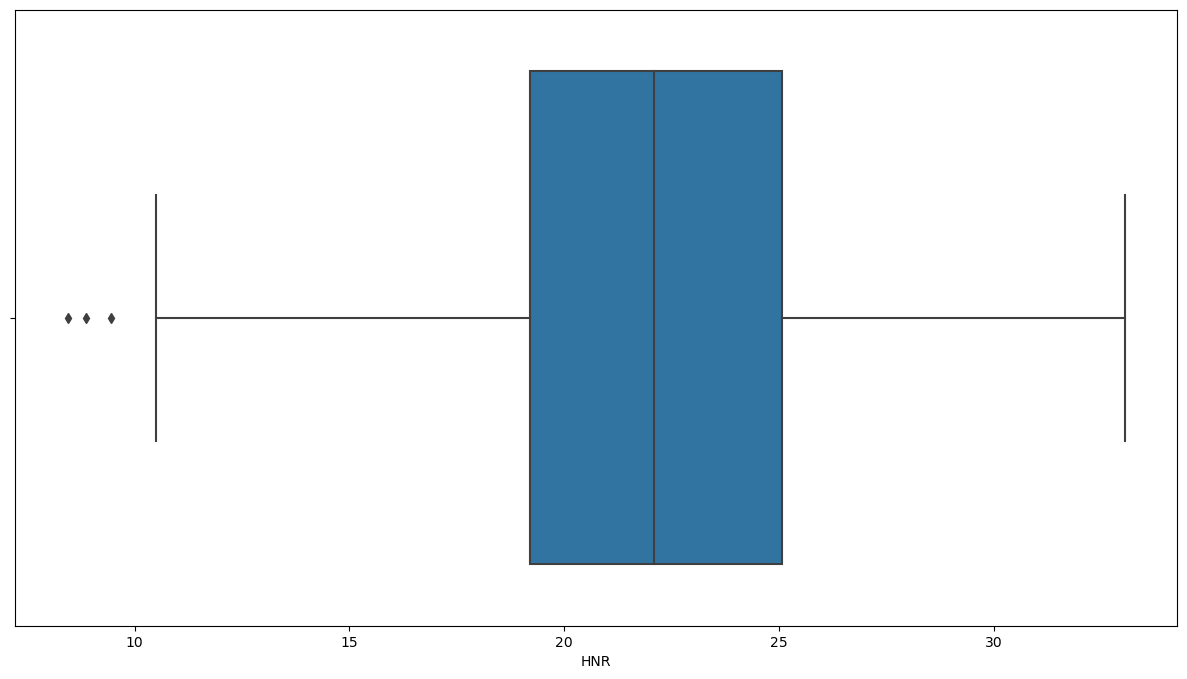

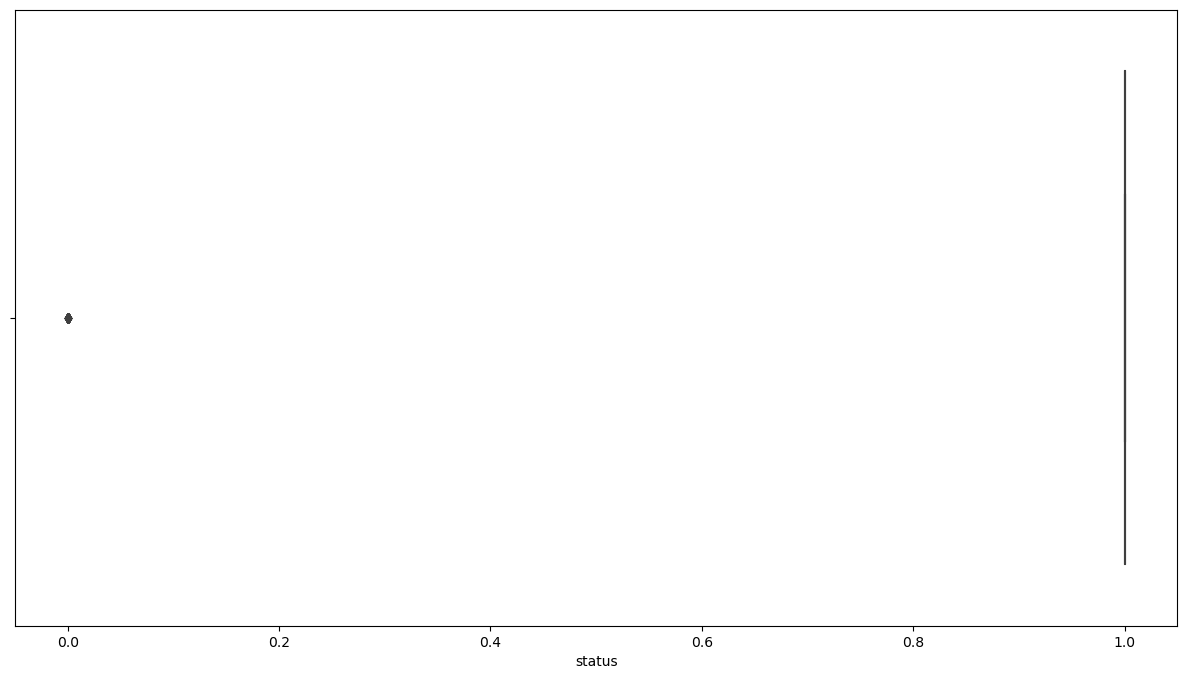

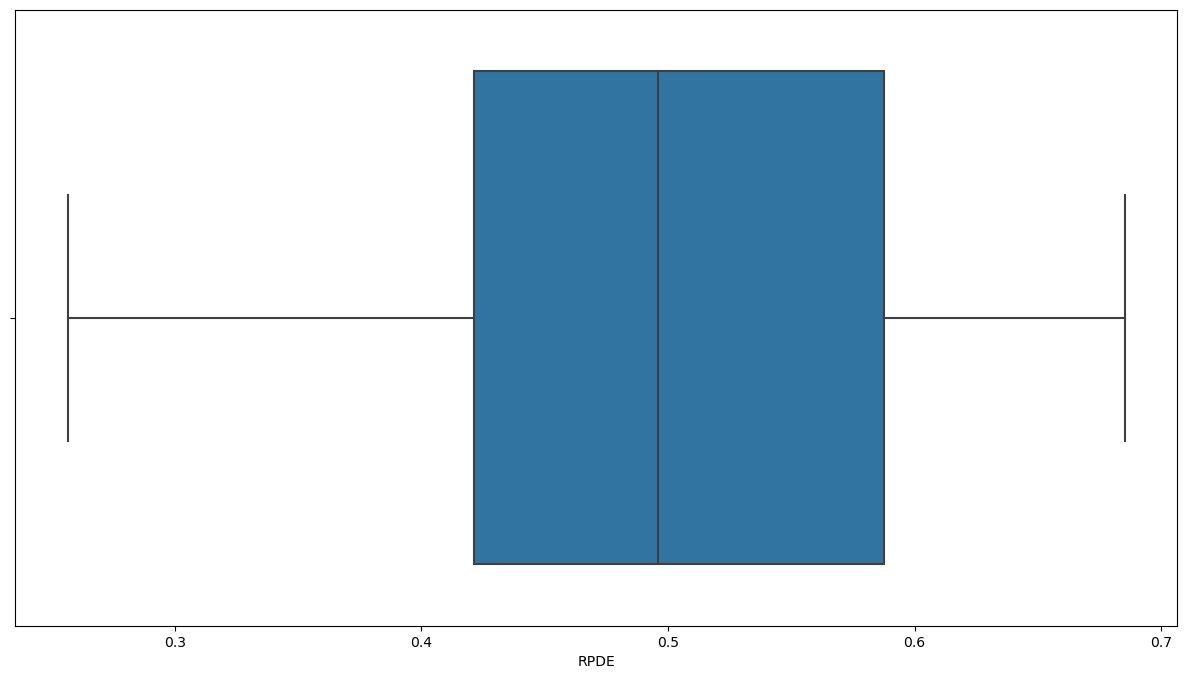

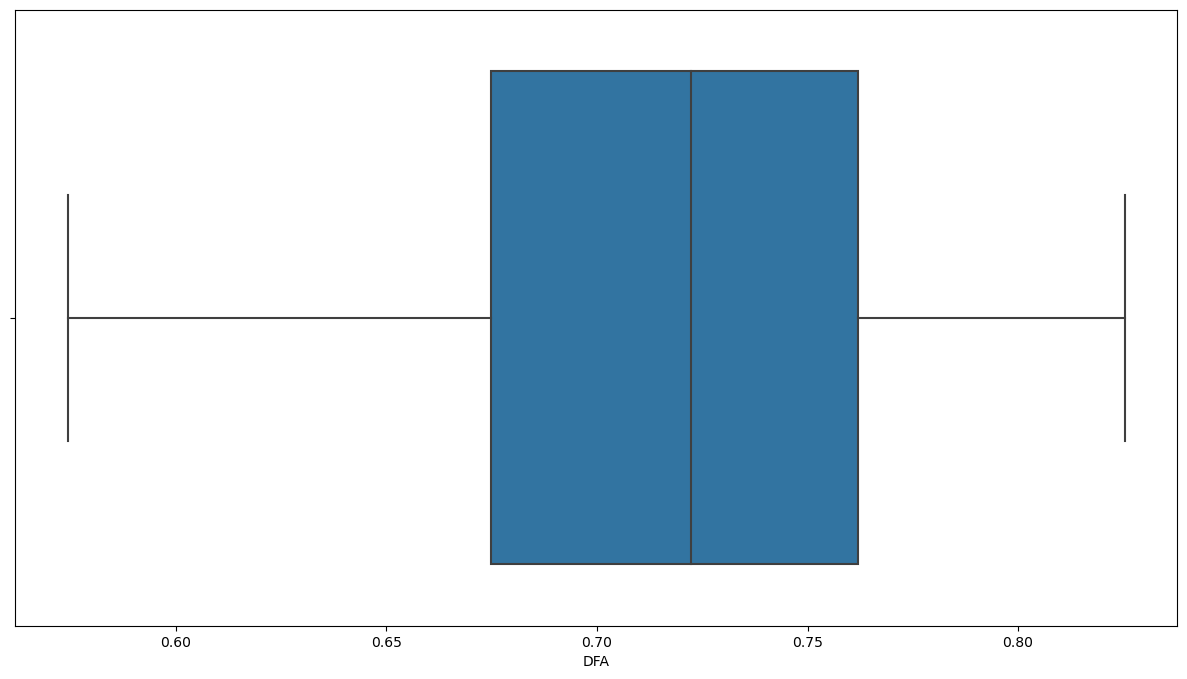

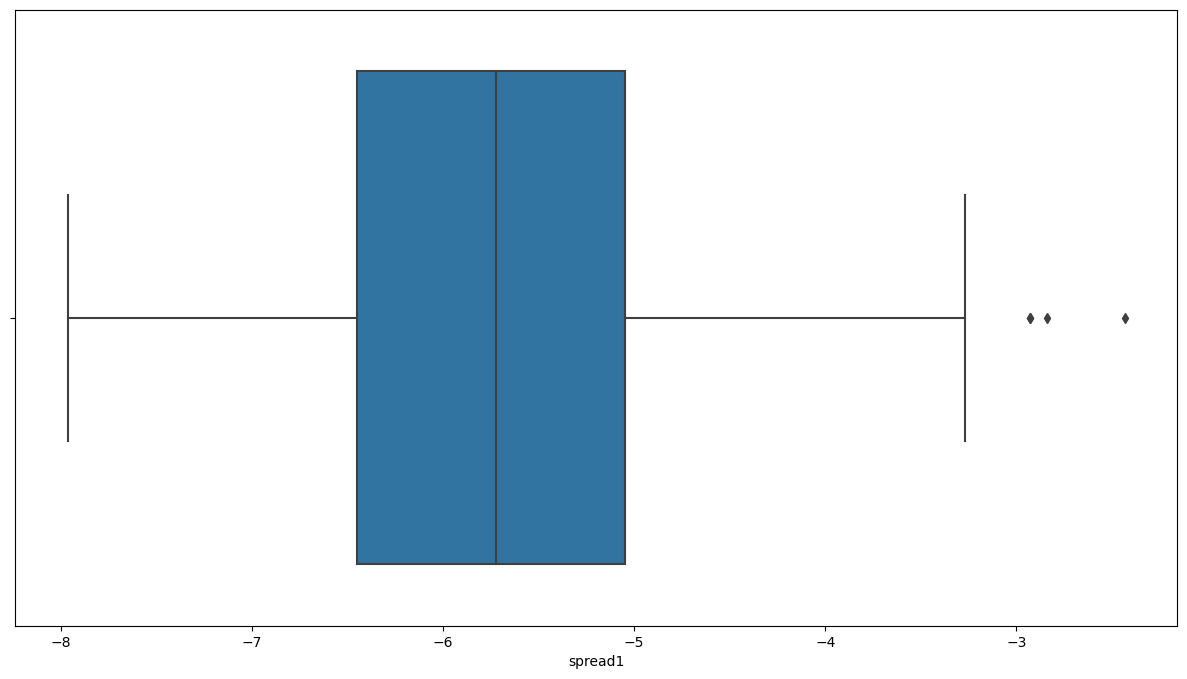

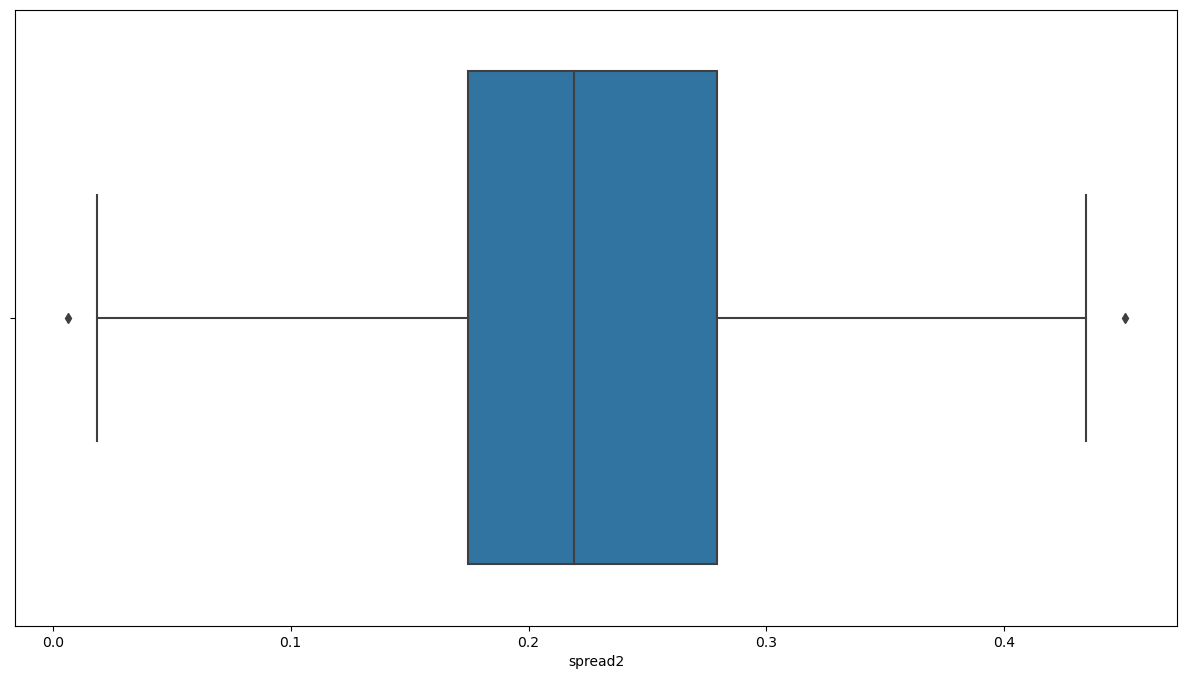

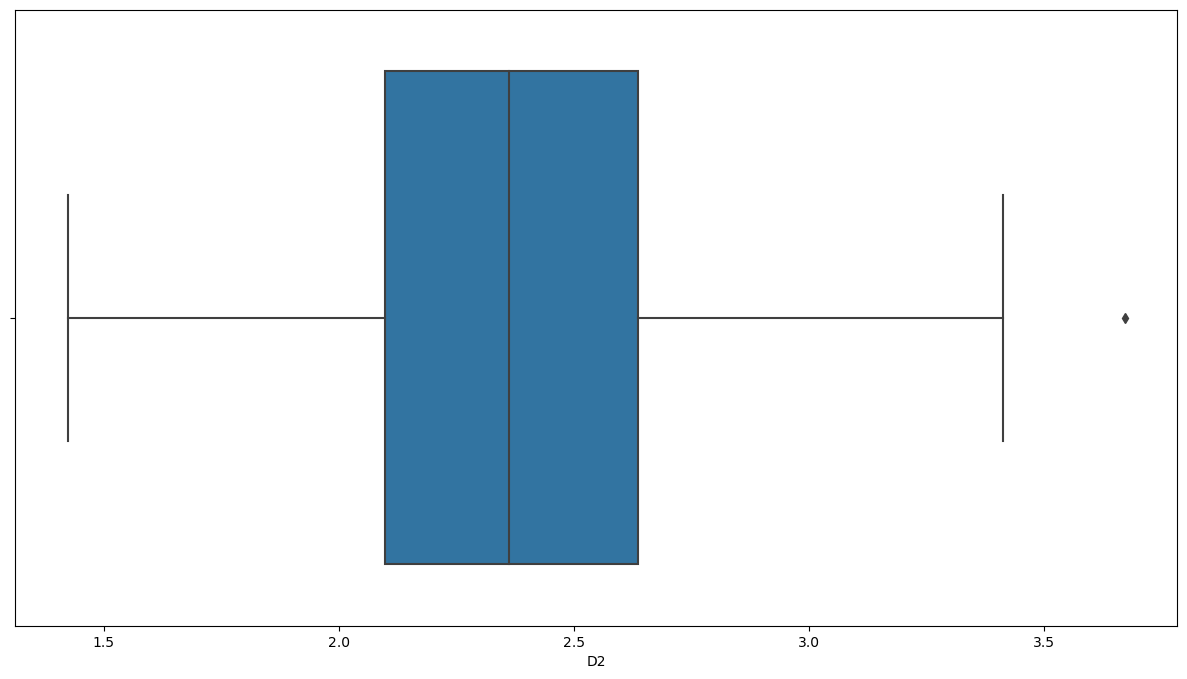

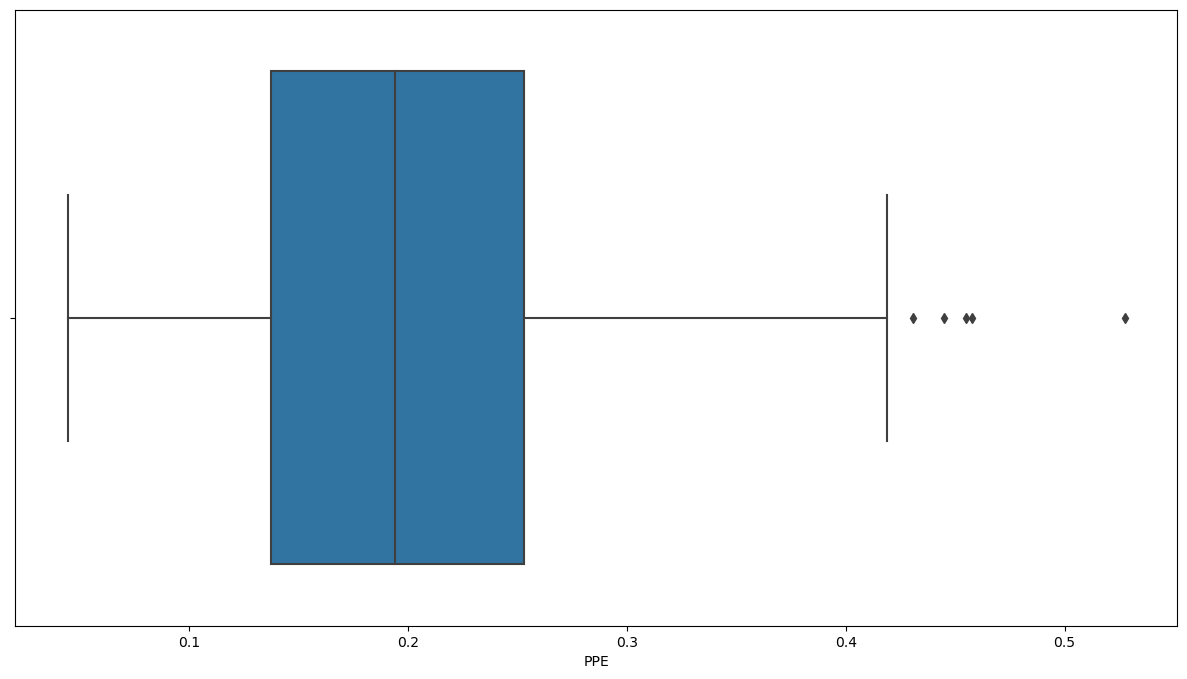

In [18]:
for c in df.columns:
    sns.boxplot(data=df,x=c)
    plt.show()

 MDVP:Fhi(Hz), MDVP:Jitter(%), MDVP:RAP, MDVP:PPQ, Jitter:DDP,Shimmer:APQ5,MDVP:APQ,NHR Having high amount of outliers

# Checking id there are any strong correlations among the independent features

In [19]:
X=df.drop('status',axis=1)
y=df['status']

In [20]:
c=X.corr()[abs(X.corr())>0.5]
c

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,NaN,0.596546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Fhi(Hz),NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Flo(Hz),0.596546,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Jitter(%),NaN,NaN,NaN,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.758255,0.746635,0.906959,-0.728165,NaN,NaN,0.693577,NaN,NaN,0.721543
MDVP:Jitter(Abs),NaN,NaN,NaN,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.648793,0.697170,0.834972,-0.656810,NaN,NaN,0.735779,NaN,NaN,0.748162
MDVP:RAP,NaN,NaN,NaN,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.737455,0.744919,0.919521,-0.721543,NaN,NaN,0.648328,NaN,NaN,0.670999
MDVP:PPQ,NaN,NaN,NaN,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.804139,0.763592,0.844604,-0.731510,NaN,NaN,0.716489,NaN,NaN,0.769647
Jitter:DDP,NaN,NaN,NaN,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.737439,0.744901,0.919548,-0.721494,NaN,NaN,0.648328,NaN,NaN,0.671005
MDVP:Shimmer,NaN,NaN,NaN,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.950083,0.987626,0.722194,-0.835271,NaN,NaN,0.654734,NaN,0.507088,0.693771
MDVP:Shimmer(dB),NaN,NaN,NaN,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.960977,0.963202,0.744477,-0.827805,NaN,NaN,0.652547,NaN,0.512233,0.695058


we can observe a strong coreation among the varaibles 

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# create a column of variable names


# print the VIF
print(vif)

            Features    VIF_Factor
0        MDVP:Fo(Hz)  1.022428e+02
1       MDVP:Fhi(Hz)  8.880351e+00
2       MDVP:Flo(Hz)  1.805201e+01
3     MDVP:Jitter(%)  5.065606e+02
4   MDVP:Jitter(Abs)  1.227165e+02
5           MDVP:RAP  3.101964e+06
6           MDVP:PPQ  2.738036e+02
7         Jitter:DDP  3.103949e+06
8       MDVP:Shimmer  2.653657e+03
9   MDVP:Shimmer(dB)  3.031024e+02
10      Shimmer:APQ3  5.115299e+07
11      Shimmer:APQ5  3.428411e+02
12          MDVP:APQ  1.840536e+02
13       Shimmer:DDA  5.112630e+07
14               NHR  1.599717e+01
15               HNR  1.321105e+02
16              RPDE  5.561441e+01
17               DFA  4.149150e+02
18           spread1  3.843696e+02
19           spread2  2.307622e+01
20                D2  1.126541e+02
21               PPE  1.334913e+02


# Split dataset into training & test dataset

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(156, 22)
(39, 22)
(156,)
(39,)


# Creating a default decision tree model using criterion = Entropy

In [24]:
from sklearn.tree import DecisionTreeClassifier

decision_tree=DecisionTreeClassifier(criterion = 'entropy',random_state=10)
decision_tree.fit(X_train,y_train)
print('Accuracy:',decision_tree.score(X_test,y_test))

Accuracy: 0.8461538461538461


# Using regularization parameters of max_depth, min_sample_leaf to recreate the model and checking the the impact on the model accuracy

In [25]:
decision_tree=DecisionTreeClassifier(max_depth=12,min_samples_leaf=5,criterion = 'entropy',random_state=10)
decision_tree.fit(X_train,y_train)
print('Accuracy:',decision_tree.score(X_test,y_test))

Accuracy: 0.8717948717948718


Accuracy increase as the max_depth and min_sample_leaf increases 

# Implementing a Random Forest model.

In [27]:
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier()

RF.fit(X_train,y_train)
print('Accuracy:',RF.score(X_test,y_test))

Accuracy: 0.8974358974358975


In [28]:
from sklearn.model_selection import GridSearchCV

In [31]:
paramaters = [{ 'n_estimators' : np.arange(150)}]
 
RF=RandomForestClassifier(random_state=1)


RF_grid = GridSearchCV(estimator = RF, 
                          param_grid = paramaters, 
                          cv = 5)

# fit the model on X_train and y_train using fit()
RF_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters Random forest classifier:', RF_grid.best_params_)

Best parameters Random forest classifier: {'n_estimators': 124}


In [33]:
RF=RandomForestClassifier(n_estimators=124)

RF.fit(X_train,y_train)
print('Accuracy:',RF.score(X_test,y_test))

Accuracy: 0.9230769230769231


In [34]:
pred = RF.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [39]:
accuracy_score(y_test,pred)

0.9230769230769231

Finally we get good accuracy score on training and testing data 

In [41]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



In [44]:
print(confusion_matrix(y_test,pred))

[[ 8  2]
 [ 1 28]]
